# <center>`Unsupervised Learning`<center>
    
###### Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import scipy.stats as stats

###### Read the data

In [47]:
df = pd.read_csv('Data/filled_train_28-03.csv')
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(360)
df.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Months_Since_Deliquency,Interest_Rate
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,Rent,not verified,car,Female,360.0,1
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,Mortgage,VERIFIED - income,debt_consolidation,Female,17.0,3
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,Mortgage,VERIFIED - income,debt_consolidation,Male,360.0,3
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,Own,VERIFIED - income,debt_consolidation,Female,360.0,1
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,Rent,VERIFIED - income,credit_card,Male,360.0,3


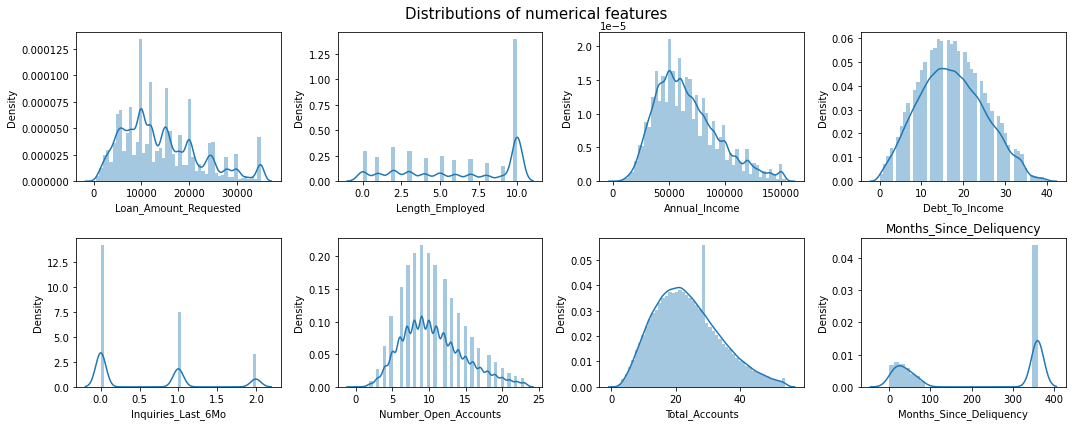

In [48]:
data_dist = df.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,6))
for variables,plotsubs in zip(data_dist.columns,ax.flatten()):
    plt.title(variables)
    plotsubs.tick_params(labelsize = 10)
    plotsubs.set_xlabel(variables,fontsize = 10)
    sns.distplot(df[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92) 
fig.suptitle('Distributions of numerical features',fontsize = 15)
plt.show()

###### Making same transformations as in Classification notebook

In [49]:
data1 = df.copy()

In [5]:
data1['Loan_Amount_Requested'] = np.sqrt(data1['Loan_Amount_Requested'])
data1['Annual_Income'] = stats.boxcox(data1['Annual_Income'])[0]
data1['Number_Open_Accounts'] = np.sqrt(data1['Number_Open_Accounts'])
data1['Total_Accounts'] = np.sqrt(data1['Total_Accounts'])
data1['Months_Since_Deliquency'] = np.log(abs(df['Months_Since_Deliquency']-np.mean(df['Months_Since_Deliquency'])))
#Months_Since_Deliquency is sort of multi-modal

In [6]:
# def emp(x):
#     if x>=10:
#         return '10+yrs'
#     elif x>=6 and x<=9:
#         return '6-9 yrs'
#     elif x>=2 and x<=5:
#         return '2-5 yrs'
#     else:
#         return '0-1 yrs'

# data1['Length_Employed'] = data1['Length_Employed'].apply(emp)

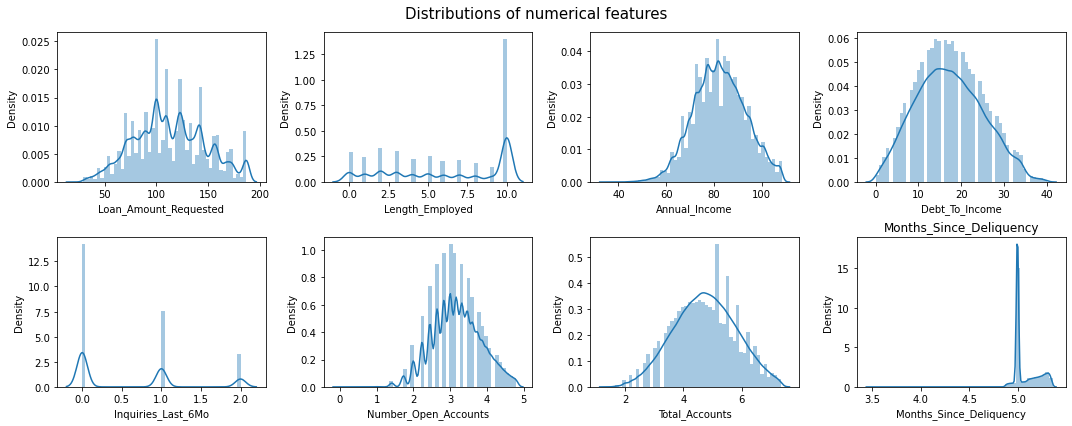

In [7]:
data_dist = data1.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,6))
for variables,plotsubs in zip(data_dist.columns,ax.flatten()):
    plt.title(variables)
    plotsubs.tick_params(labelsize = 10)
    plotsubs.set_xlabel(variables,fontsize = 10)
    sns.distplot(data_dist[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92) 
fig.suptitle('Distributions of numerical features',fontsize = 15)
plt.show()

In [50]:
#Instead of using OneHotEncoder, we will be using label encoder here since magnitude would not matter in USL
data1.drop('Interest_Rate',axis = 1,inplace = True)

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data1.select_dtypes('object').columns:
    data1[i] = le.fit_transform(data1[i])

###### Standardizing the dataset

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data1),columns = data1.columns)

###### Data is now ready for applying Unsupervised learning techniques

###### K-Means Clustering

In [62]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(data_scaled)
    wcv.append(km.inertia_)

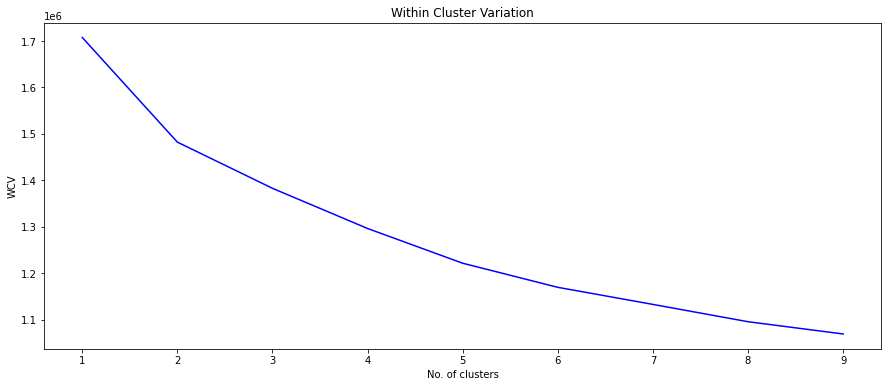

In [63]:
plt.figure(figsize = (15,6))
plt.title('Within Cluster Variation')
plt.plot(range(1,10),wcv,color = 'b')
plt.xlabel('No. of clusters')
plt.ylabel('WCV')
plt.show()

In [85]:
#Optimum number of clusters are 2,3 or 4. Since our dataset had 3 clusters in the begining we will be going with
#3 clusters.
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(data_scaled)
target1 = pd.Series(km.predict(data_scaled),name = 'Interest_Rate')

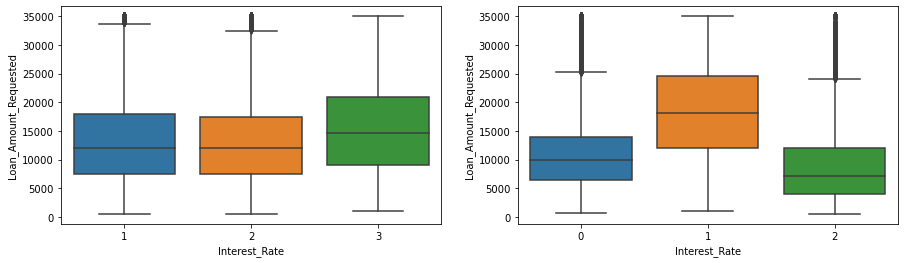

In [86]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
comp = 'Loan_Amount_Requested'
targ = 'Interest_Rate'
sns.boxplot(df[targ],data1[comp],ax = ax[0])
sns.boxplot(target1,data1[comp],ax = ax[1])
plt.show()

In [87]:
df['Interest_Rate'].value_counts()

2    62405
3    49957
1    29937
Name: Interest_Rate, dtype: int64

In [88]:
#Using loan amount requested to rename the predicted target
target1.value_counts()

0    66797
1    60795
2    14707
Name: Interest_Rate, dtype: int64

In [91]:
target1.map({0:2,1:3,2:1}).value_counts()

2    66797
3    60795
1    14707
Name: Interest_Rate, dtype: int64

In [93]:
df[df['Interest_Rate']==target1.map({0:2,1:3,2:1})].shape
#We see 57454 values that match with the original target variable. This could explain the low accuracy in the 
#classification models.

(57454, 13)

In [117]:
target1 = target1.map({0:2,1:3,2:1})

###### Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
X_a = data_scaled.sample(40000)
plt.figure(figsize = (15,6))
sch.dendrogram(sch.linkage(X_a,'ward'))

###### Trying KMeans with PCA

In [95]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)
len(np.cumsum(pca.explained_variance_ratio_)[np.cumsum(pca.explained_variance_ratio_)<=0.95])
#10 components tends to preserve 95% of variance

10

In [96]:
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(data_scaled)

In [97]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(X_pca)
    wcv.append(km.inertia_)

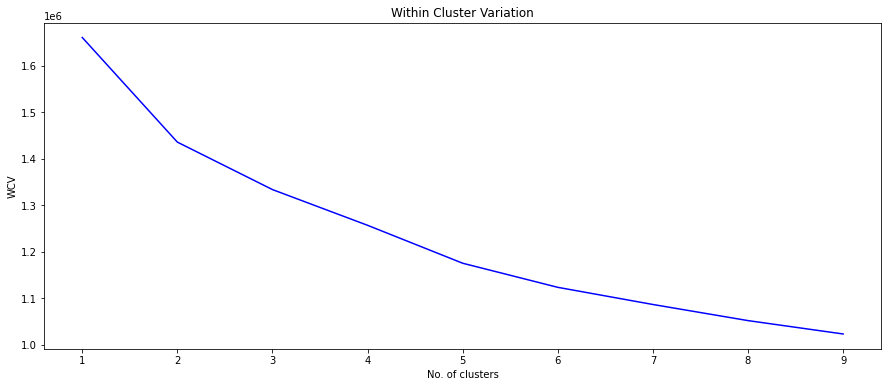

In [98]:
plt.figure(figsize = (15,6))
plt.title('Within Cluster Variation')
plt.plot(range(1,10),wcv,color = 'b')
plt.xlabel('No. of clusters')
plt.ylabel('WCV')
plt.show()

###### Hierarchial Clustering

In [125]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
X_a_pca = pd.DataFrame(X_pca).sample(40000)
plt.figure(figsize = (15,6))
sch.dendrogram(sch.linkage(X_a_pca,'ward'))

In [106]:
#Optimum number of clusters are 2,3 or 4. Since our dataset had 3 clusters in the begining we will be going with
#3 clusters.
km = KMeans(n_clusters = 3)
km.fit(X_pca)
target2 = pd.Series(km.predict(X_pca))

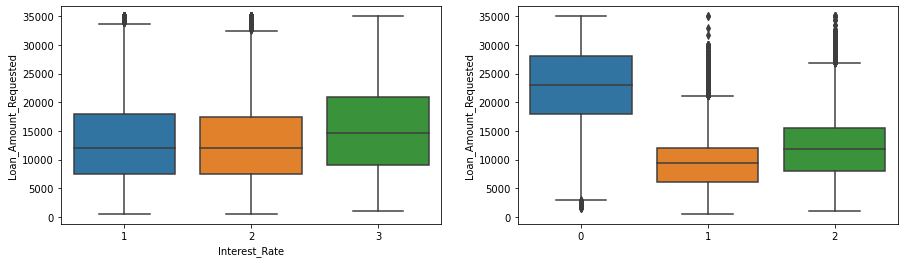

In [107]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
comp = 'Loan_Amount_Requested'
targ = 'Interest_Rate'
sns.boxplot(df[targ],data1[comp],ax = ax[0])
sns.boxplot(target2,data1[comp],ax = ax[1])
plt.show()

In [109]:
#Using loan amount requested to rename the predicted target
target2.value_counts()

1    59422
2    44543
0    38334
dtype: int64

In [108]:
df['Interest_Rate'].value_counts()

2    62405
3    49957
1    29937
Name: Interest_Rate, dtype: int64

In [110]:
target2.map({0:1,1:2,2:3}).value_counts()

2    59422
3    44543
1    38334
dtype: int64

In [114]:
df[df['Interest_Rate']==target2.map({0:1,1:2,2:3})].shape
#In case of PCA data, we see 51K targets that match with the original target

(51256, 13)

###### Inference

* The mismatch in the original target variable and our created target variable could explain the underperformance of all ML algorithms in classification. Not reducing dimensions tends to better mimic the original target variable.

# Applying Classification Algorithm the data with new target

In [124]:
df_class = pd.concat((data1,target1),axis = 1)

In [ ]:
df_class.to_csv('Data/clusters_obtained.csv',index = False)